<IPython.core.display.Javascript object>


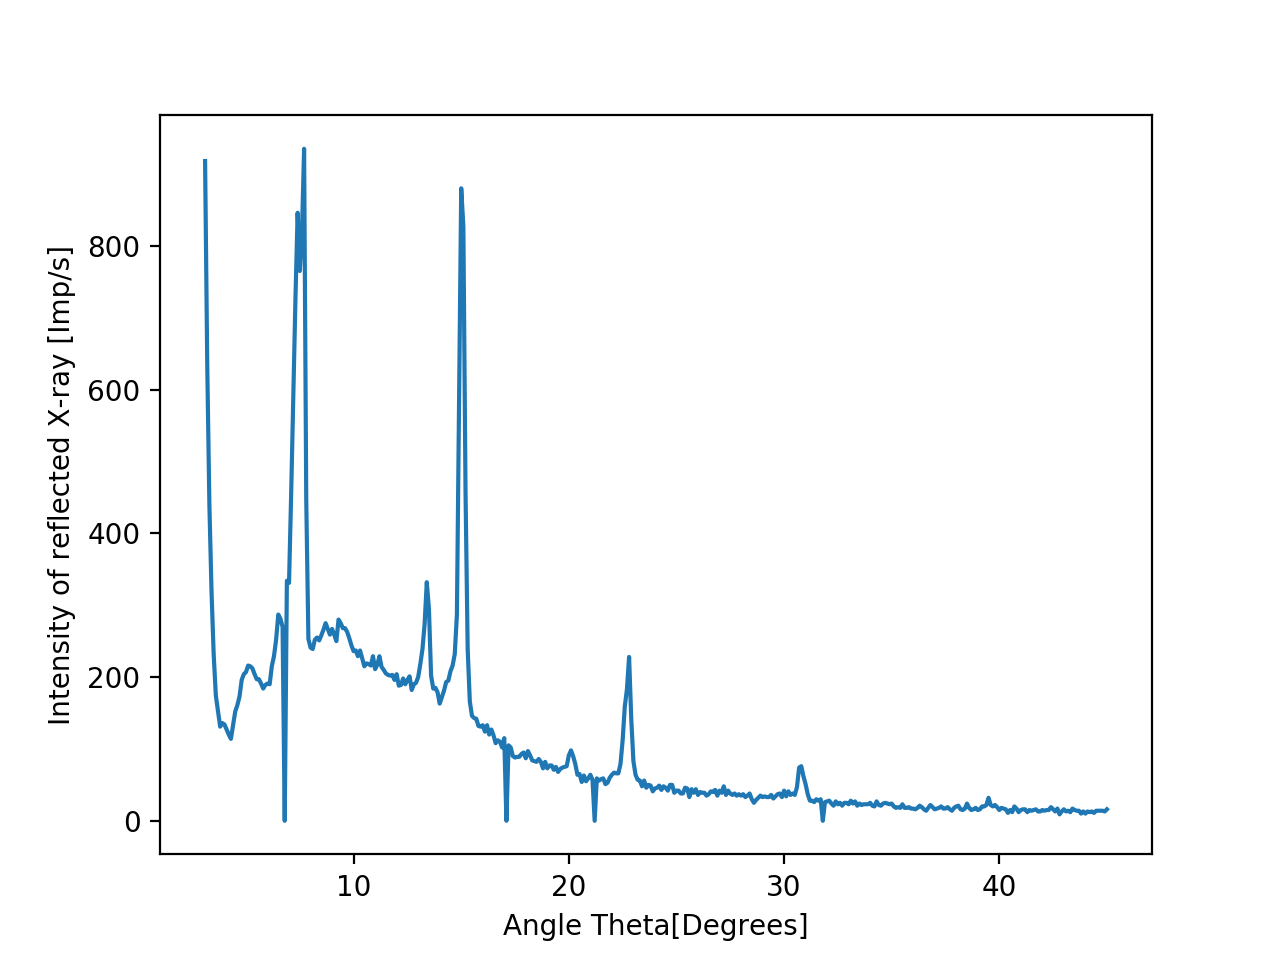

[ 3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8
  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2
  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6
  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.
 10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4
 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8
 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2
 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6
 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.
 17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4
 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8
 19.9 20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2
 21.3 21.4 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6
 22.7 22

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
angle=np.array(icc)
intens=np.array(vcc)

plt.xlabel('Angle Theta[Degrees]')
plt.ylabel('Intensity of reflected X-ray [Imp/s]')
plt.plot(angle, intens)

plt.show()

print(angle,intens)
print(type(float(int(angle[2]))))

Beta: [8.5e+02 7.4e+00 2.0e-01 1.0e-17]
Beta Std Error: [5.75291343e-313 5.75291345e-313 5.75291344e-313 5.75291341e-313]
Beta Covariance: [[5.75291341e-313 5.75291342e-313 5.75291343e-313 5.75291326e-313]
 [5.75291340e-313 5.75291340e-313 5.75291332e-313 5.75291334e-313]
 [5.75291333e-313 5.75291328e-313 5.75291327e-313 5.75291329e-313]
 [5.75291335e-313 5.75291339e-313 5.75291338e-313 5.75291337e-313]]
Residual Variance: 5.7529133575e-313
Inverse Condition #: 5.7529114002e-313
Reason(s) for Halting:
  NP < 1 or NP > N


<IPython.core.display.Javascript object>


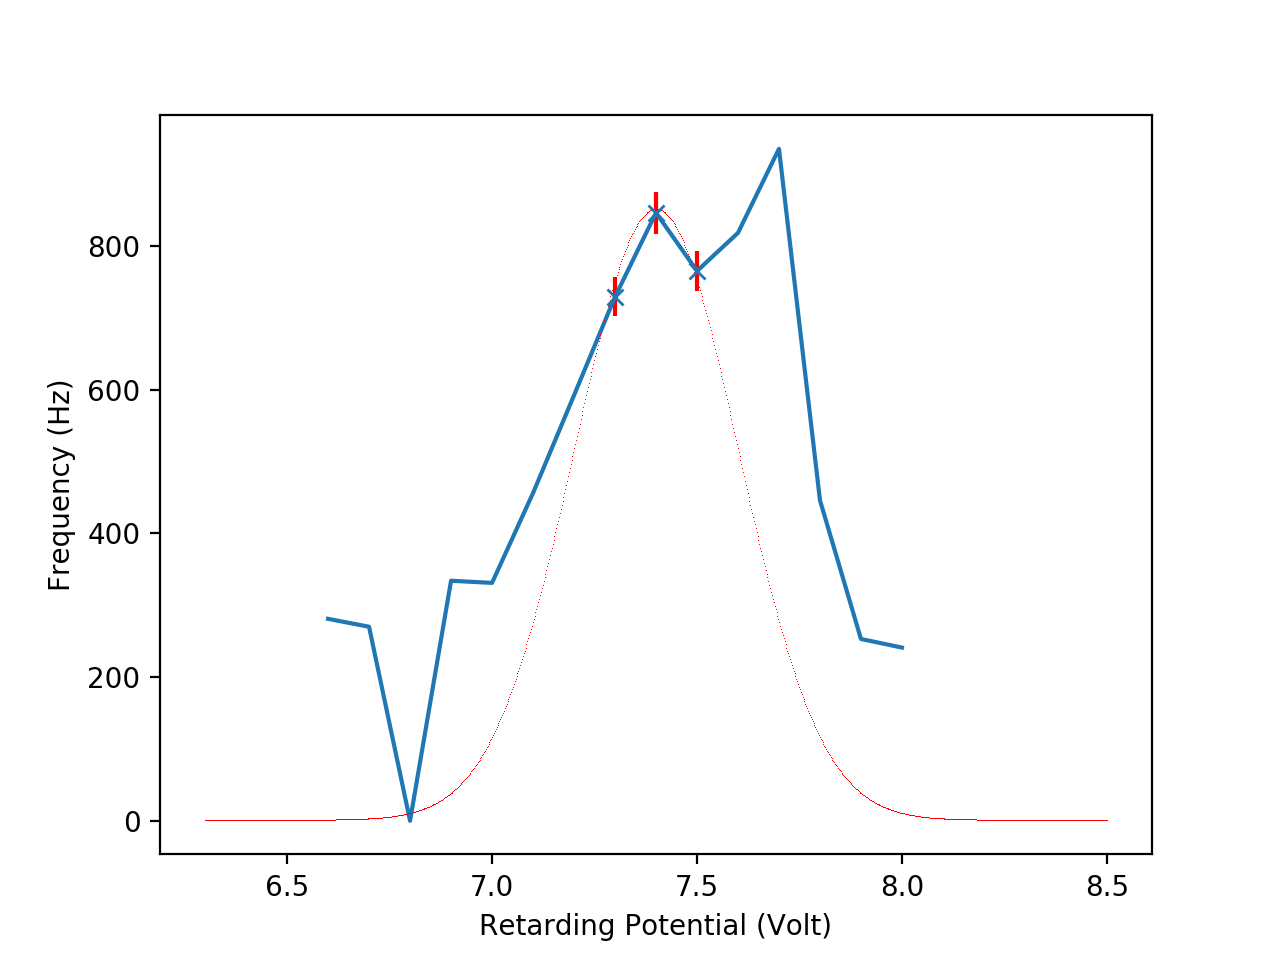

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random




import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
angle=icc[42:45]  # arrange where we get th data
intens=vcc[42:45]
angle=np.array(angle)
intens=np.array(intens)

n = len(angle)                       #the number of data
mean = sum(angle)/n                   #note this correction
sigma = np.sqrt(sum((angle-mean)**2)/n)       #note this correction


def fit_func(p,x):
    a,x0,s,c=p
    return a*np.exp(-(x-x0)**2/(2*s**2))+c

gauss = Model(fit_func)

data = RealData(angle, intens, sx=0, sy=np.sqrt(intens))

odr= ODR(data, gauss, beta0=[850., 7.4,0.2,1e-17])

out = odr.run()

out.pprint()

x_fit = np.linspace(angle[0]-1, angle[-1]+1, 1000)
y_fit = fit_func(out.beta, x_fit)

plt.errorbar(angle, intens, xerr=0, yerr=np.sqrt(intens), linestyle='None', marker='x',ecolor='r')
plt.xlabel('Retarding Potential (Volt)')
plt.ylabel('Frequency (Hz)')
plt.plot(icc[35:50], vcc[35:50])
plt.plot(x_fit,y_fit,'r,')


plt.show()




<IPython.core.display.Javascript object>


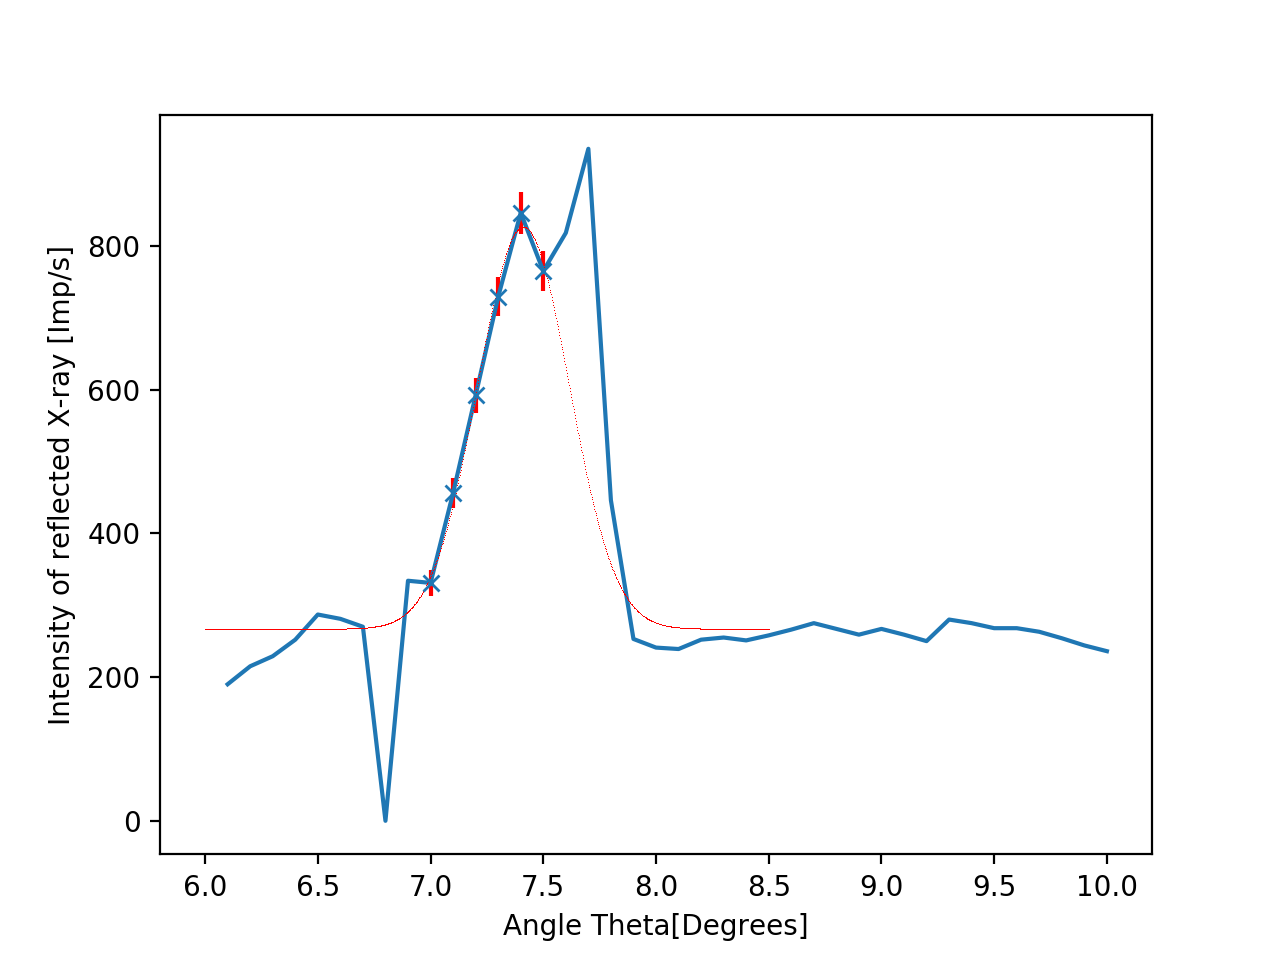

[5.59374481e+02 7.41047218e+00 2.03393430e-01 2.65838688e+02]
[7.  7.1 7.2 7.3 7.4 7.5]
[6.06384217e+01 1.49985032e-02 3.24563051e-02 6.64393961e+01]


In [129]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random




import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()

angle=icc[39:45]  # arrange where we get th data
intens=vcc[39:45]
#angle=icc[45:50]  # arrange where we get th data
#intens=vcc[45:50]
angle=np.array(angle)
intens=np.array(intens)

n = len(angle)                       #the number of data
mean = sum(angle)/n                   #note this correction
sigma = np.sqrt(sum((angle-mean)**2)/n)       #note this correction



def gaus(x,a,x0,sigma,c):
    return a*exp(-(x-x0)**2/(2*sigma**2)) +c

popt,pcov = curve_fit(gaus,angle,intens,p0=[1,mean,sigma,1.])


x_fit = np.linspace(angle[0]-1, angle[-1]+1, 1000)
y_fit = gaus(x_fit,*popt)

plt.errorbar(angle, intens, xerr=0, yerr=np.sqrt(intens), linestyle='None', marker='x',ecolor='r')
plt.xlabel('Angle Theta[Degrees]')
plt.ylabel('Intensity of reflected X-ray [Imp/s]')
#plt.plot(angle,intens)
plt.plot(icc[30:70], vcc[30:70])
plt.plot(x_fit,y_fit,'r,')
plt.savefig('yelsdvdvdsdvlow.jpg')

plt.show()


print(popt)
print(angle)
print(np.sqrt(np.diag(pcov)))

<IPython.core.display.Javascript object>


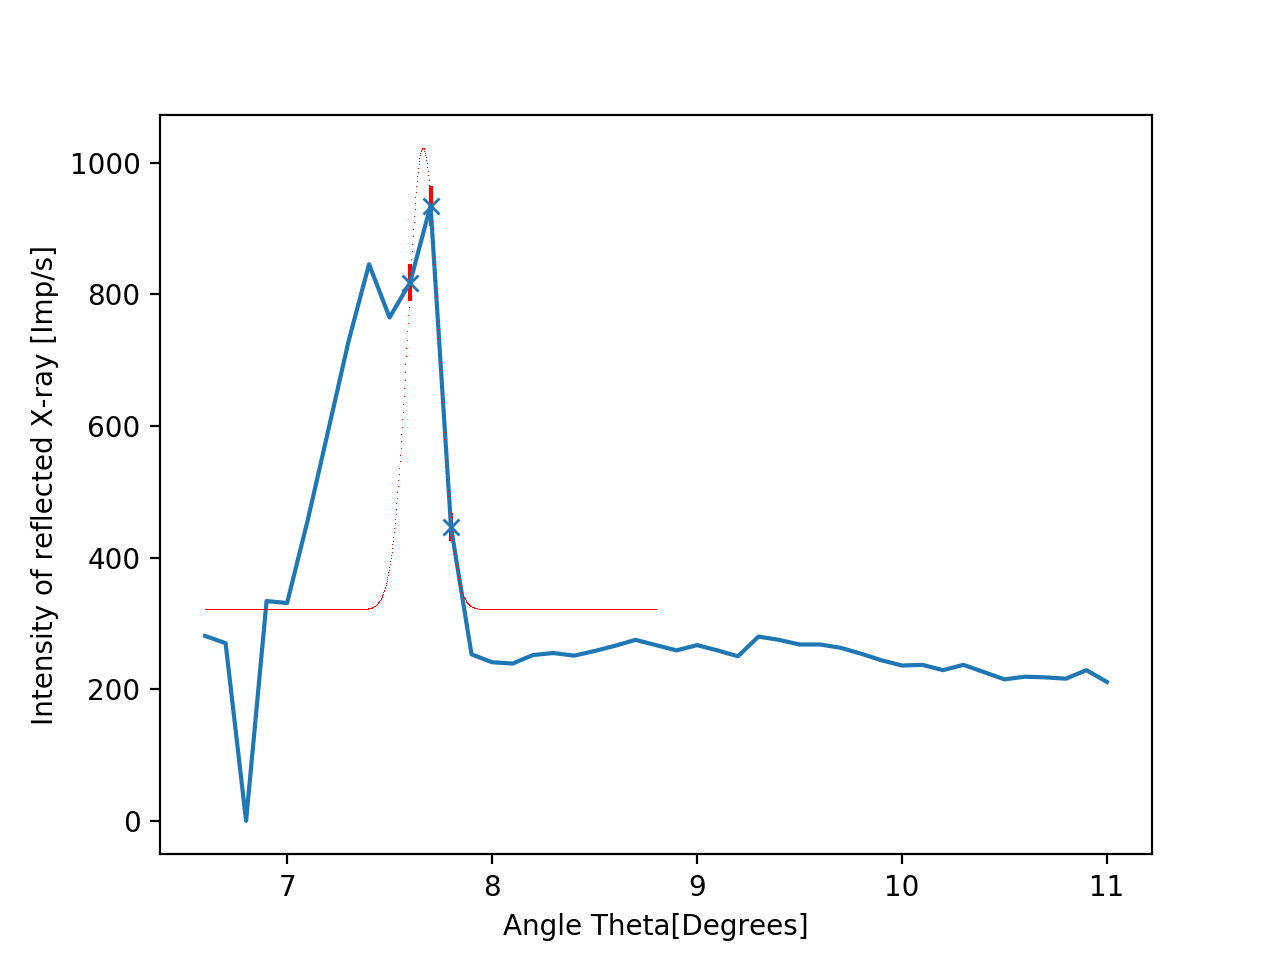

[7.01380885e+02 7.66174719e+00 7.46110245e-02]
[7.6 7.7 7.8]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
[inf inf inf]


In [123]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random




import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
angle=icc[45:48]  # arrange where we get th data
intens=vcc[45:48]
angle=np.array(angle)
intens=np.array(intens)

n = len(angle)                       #the number of data
mean = sum(angle)/n                   #note this correction
sigma = np.sqrt(sum((angle-mean)**2)/n)       #note this correction



def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))+320
popt,pcov = curve_fit(gaus,angle,intens,p0=[1,mean,sigma])


x_fit = np.linspace(angle[0]-1, angle[-1]+1, 1000)
y_fit = gaus(x_fit,*popt)

plt.errorbar(angle, intens, xerr=0, yerr=np.sqrt(intens), linestyle='None', marker='x',ecolor='r')
plt.xlabel('Angle Theta[Degrees]')
plt.ylabel('Intensity of reflected X-ray [Imp/s]')
#plt.plot(angle,intens)
plt.plot(icc[35:80], vcc[35:80])
plt.plot(x_fit,y_fit,'r,')

plt.savefig('yeldfvdfvdlow.jpg')
plt.show()



print(popt)
print(angle)
print(pcov)
print(np.sqrt(np.diag(pcov)))

<IPython.core.display.Javascript object>


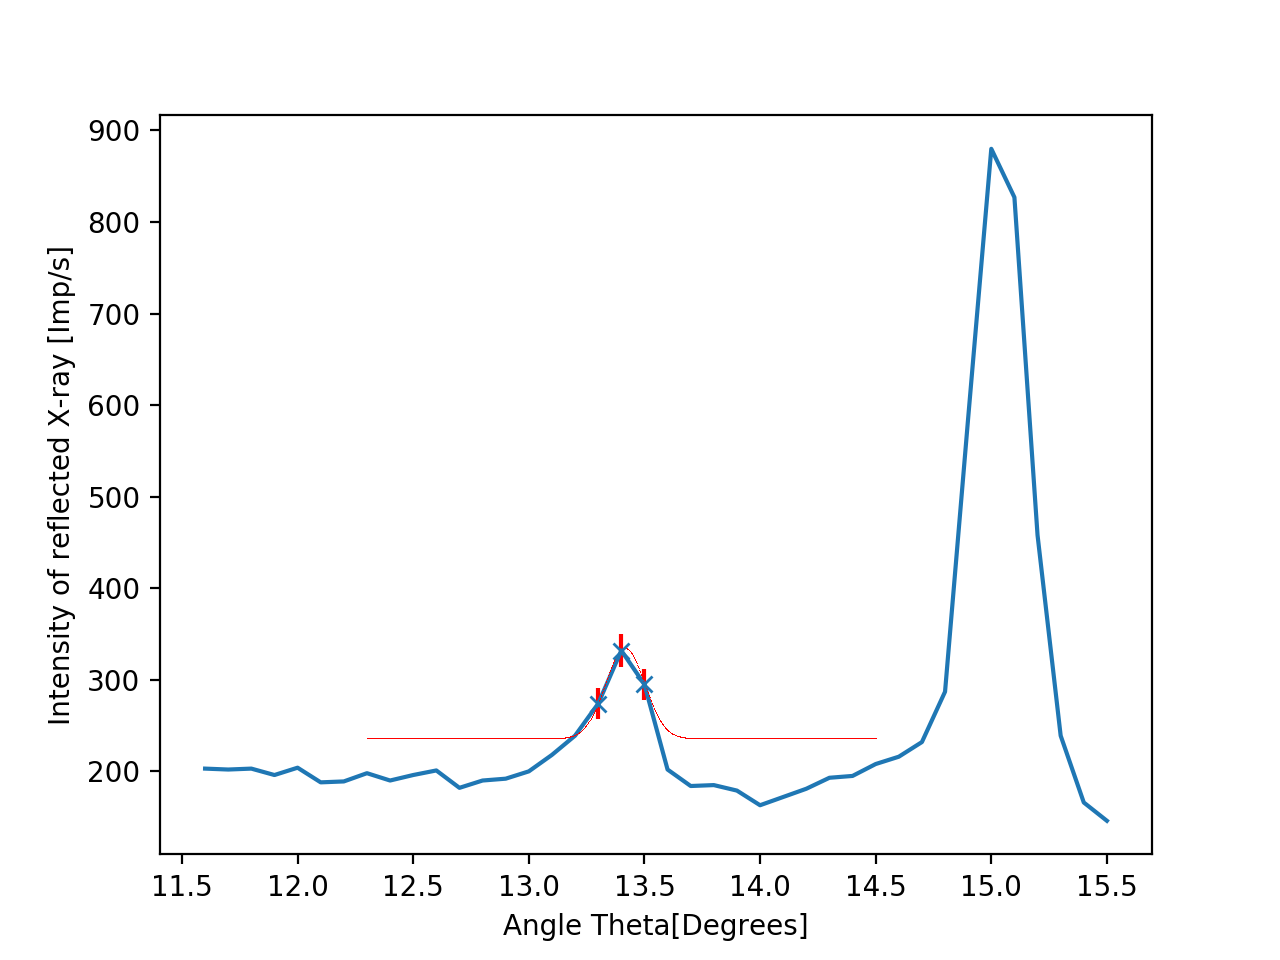

[9.86305550e+01 1.34154789e+01 8.47726847e-02]
[13.3 13.4 13.5]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
[inf inf inf]


In [124]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random




import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
angle=icc[102:105]  # arrange where we get th data
intens=vcc[102:105]
angle=np.array(angle)
intens=np.array(intens)

n = len(angle)                       #the number of data
mean = sum(angle)/n                   #note this correction
sigma = np.sqrt(sum((angle-mean)**2)/n)       #note this correction



def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))+235
popt,pcov = curve_fit(gaus,angle,intens,p0=[1,mean,sigma])


x_fit = np.linspace(angle[0]-1, angle[-1]+1, 1000)
y_fit = gaus(x_fit,*popt)

plt.errorbar(angle, intens, xerr=0, yerr=np.sqrt(intens), linestyle='None', marker='x',ecolor='r')
plt.xlabel('Angle Theta[Degrees]')
plt.ylabel('Intensity of reflected X-ray [Imp/s]')
#plt.plot(angle,intens)
plt.plot(icc[85:125], vcc[85:125])
plt.plot(x_fit,y_fit,'r,')

plt.savefig('yellfdvsdfvsdow.jpg')
plt.show()




print(popt)
print(angle)
print(pcov)
print(np.sqrt(np.diag(pcov)))

<IPython.core.display.Javascript object>


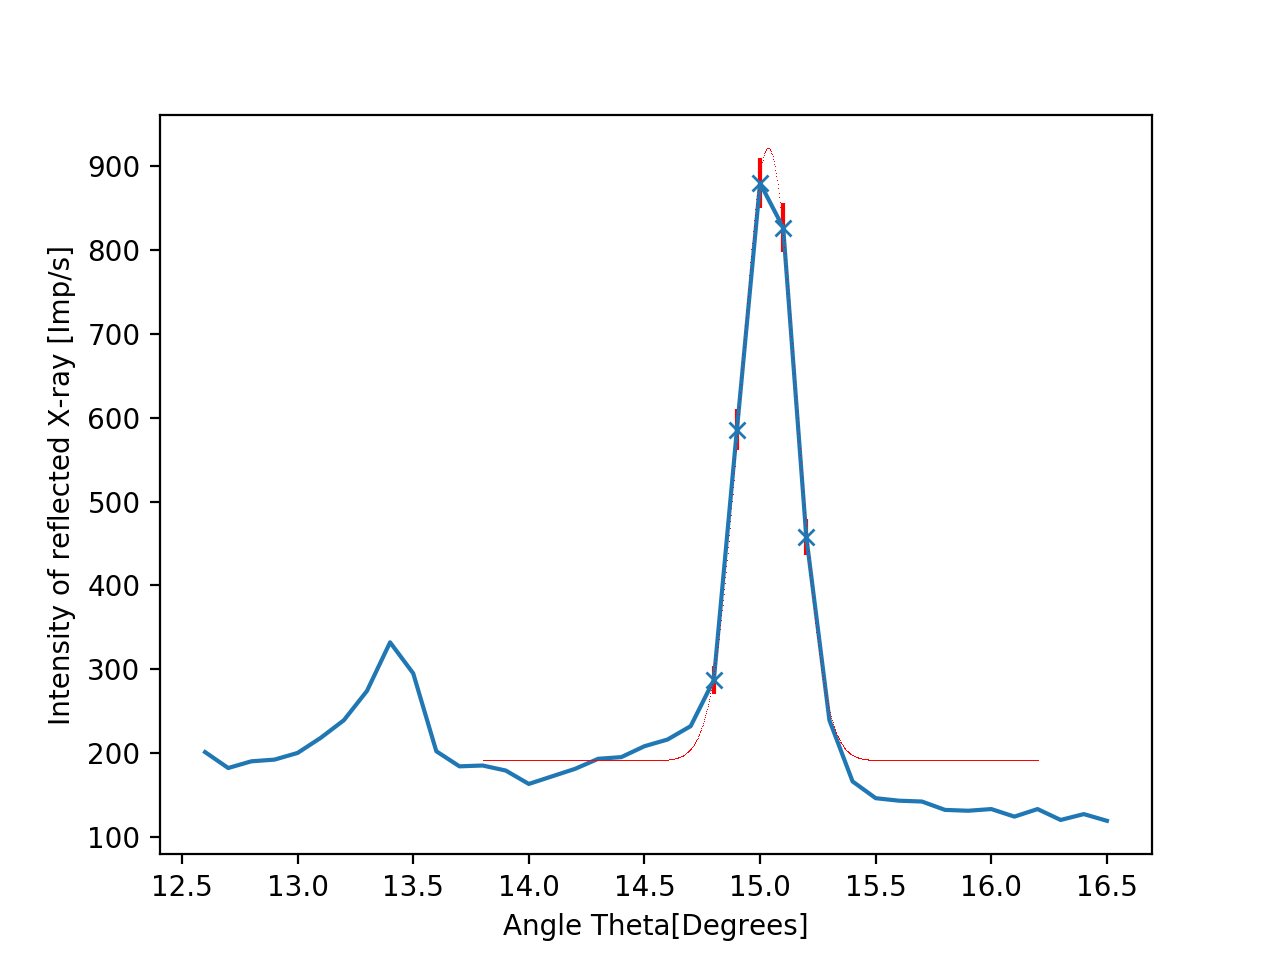

[ 7.31052588e+02  1.50341798e+01 -1.18574251e-01]
[14.8 14.9 15.  15.1 15.2]
[[ 1.64926574e+02 -9.52207953e-04  1.96992788e-02]
 [-9.52207953e-04  5.79175503e-06 -3.98637811e-07]
 [ 1.96992788e-02 -3.98637811e-07  6.60383045e-06]]
[1.28423742e+01 2.40660654e-03 2.56979191e-03]


In [125]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random




import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
angle=icc[117:122]  # arrange where we get th data
intens=vcc[117:122]
angle=np.array(angle)
intens=np.array(intens)

n = len(angle)                       #the number of data
mean = sum(angle)/n                   #note this correction
sigma = np.sqrt(sum((angle-mean)**2)/n)       #note this correction



def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))+190

popt,pcov = curve_fit(gaus,angle,intens,p0=[1,mean,sigma])


x_fit = np.linspace(angle[0]-1, angle[-1]+1, 1000)
y_fit = gaus(x_fit,*popt)

plt.errorbar(angle, intens, xerr=0, yerr=np.sqrt(intens), linestyle='None', marker='x',ecolor='r')
plt.xlabel('Angle Theta[Degrees]')
plt.ylabel('Intensity of reflected X-ray [Imp/s]')
#plt.plot(angle,intens)
plt.plot(icc[95:135], vcc[95:135])
plt.plot(x_fit,y_fit,'r,')

plt.savefig('yesdfvsdfvsdllow.jpg')
plt.show()



print(popt)

print(angle)
print(pcov)
print(np.sqrt(np.diag(pcov)))

<IPython.core.display.Javascript object>


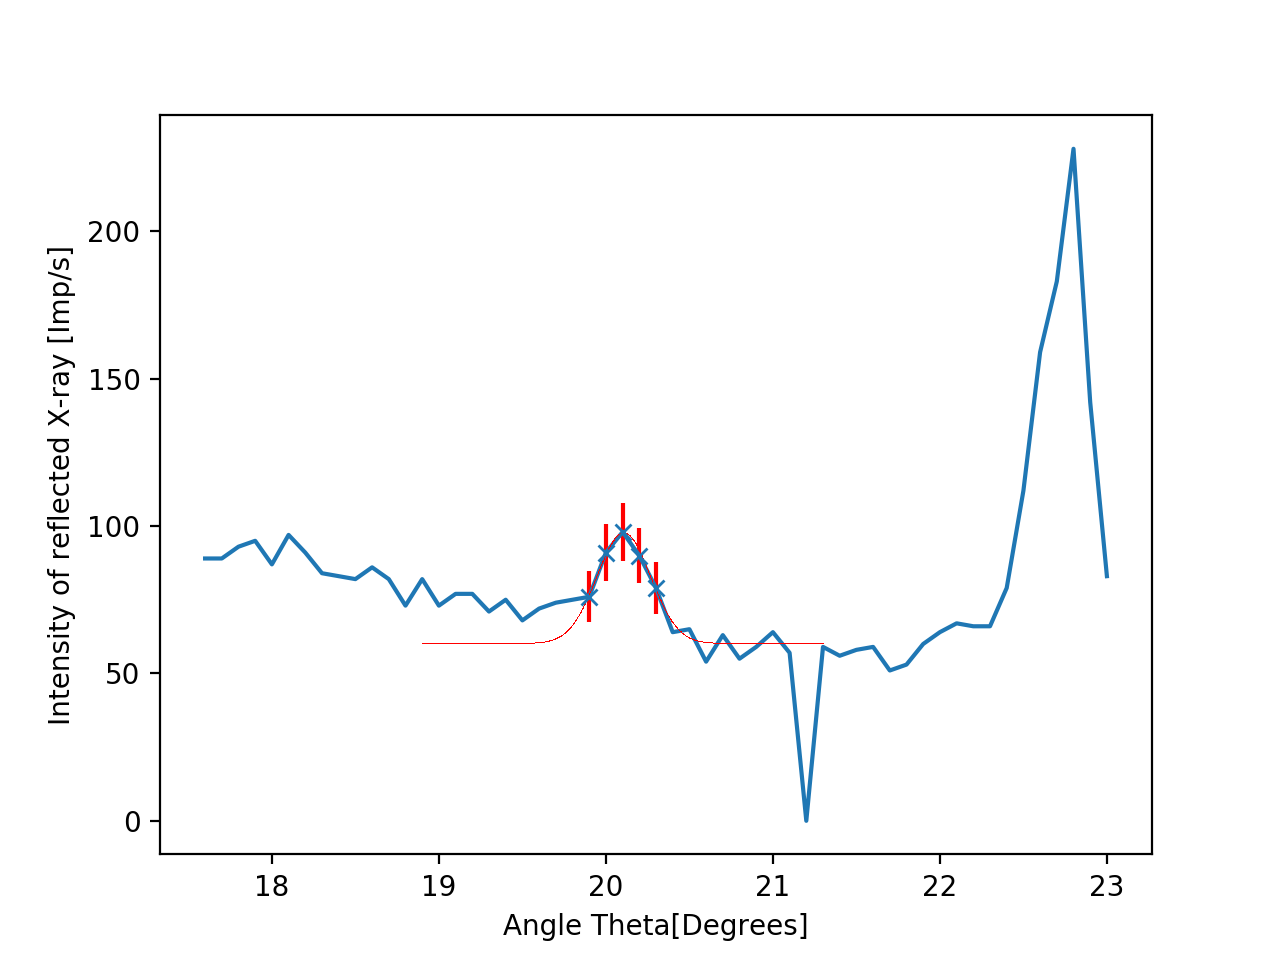

[37.48792368 20.1043927  -0.16104745]
[19.9 20.  20.1 20.2 20.3]
[1.1615798  0.005873   0.00754747]


In [126]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random




import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
angle=icc[168:173]  # arrange where we get th data
intens=vcc[168:173]
angle=np.array(angle)
intens=np.array(intens)

n = len(angle)                       #the number of data
mean = sum(angle)/n                   #note this correction
sigma = np.sqrt(sum((angle-mean)**2)/n)       #note this correction



def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))+60

popt,pcov = curve_fit(gaus,angle,intens,p0=[1,mean,sigma])


x_fit = np.linspace(angle[0]-1, angle[-1]+1, 1000)
y_fit = gaus(x_fit,*popt)

plt.errorbar(angle, intens, xerr=0, yerr=np.sqrt(intens), linestyle='None', marker='x',ecolor='r')
plt.xlabel('Angle Theta[Degrees]')
plt.ylabel('Intensity of reflected X-ray [Imp/s]')
#plt.plot(angle,intens)
plt.plot(icc[145:200], vcc[145:200])
plt.plot(x_fit,y_fit,'r,')


plt.savefig('yellovsdsdw.jpg')
plt.show()






print(popt)
print(angle)
print(np.sqrt(np.diag(pcov)))

<IPython.core.display.Javascript object>


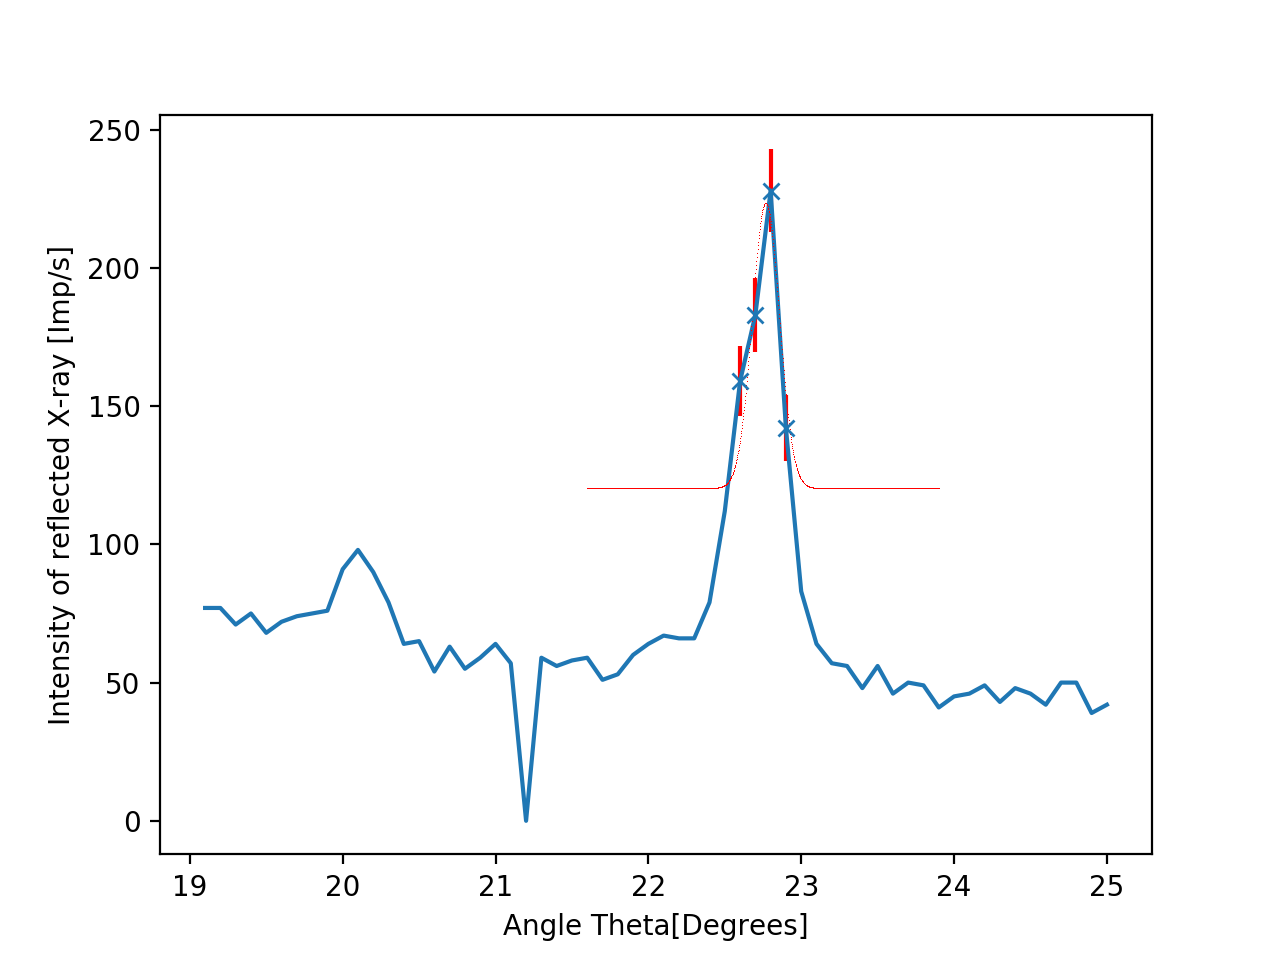

[ 1.03262684e+02  2.27669384e+01 -8.84307226e-02]
[22.6 22.7 22.8 22.9]
[[ 9.36036516e+02 -2.73742777e-02  5.72722753e-01]
 [-2.73742777e-02  8.88013892e-04 -4.56631023e-05]
 [ 5.72722753e-01 -4.56631023e-05  9.83321302e-04]]
[3.05947139e+01 2.97995619e-02 3.13579544e-02]


In [127]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random




import pylab
import pandas

colnames = ['A1', 'B1']
data = pandas.read_excel("35_kv.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
angle=icc[195:199]  # arrange where we get th data
intens=vcc[195:199]
angle=np.array(angle)
intens=np.array(intens)

n = len(angle)                       #the number of data
mean = sum(angle)/n                   #note this correction
sigma = np.sqrt(sum((angle-mean)**2)/n)       #note this correction



def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))+120

popt,pcov = curve_fit(gaus,angle,intens,p0=[1,mean,sigma])


x_fit = np.linspace(angle[0]-1, angle[-1]+1, 1000)
y_fit = gaus(x_fit,*popt)

plt.errorbar(angle, intens, xerr=0, yerr=np.sqrt(intens), linestyle='None', marker='x',ecolor='r')
plt.xlabel('Angle Theta[Degrees]')
plt.ylabel('Intensity of reflected X-ray [Imp/s]')
#plt.plot(angle,intens)
plt.plot(icc[160:220], vcc[160:220])
plt.plot(x_fit,y_fit,'r,')

plt.savefig('ybgdsbellow.jpg')
plt.show()






print(popt)
print(angle)
print(pcov)
print(np.sqrt(np.diag(pcov)))